In [2]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import parc
import scipy.cluster.hierarchy as sch
import matplotlib
from collections import defaultdict
import logging
import pickle
import matplotlib.patches as mpatches
from collections import Counter
import os 
from skimage import img_as_ubyte
import skimage

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Import path for config
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

# Import path for src
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from config import *
import my_io as io

# Import metadata information

In [6]:
df_metadata = pd.read_csv(data_dir / 'metadata.csv')
df_metadata.head()

,Pos,Grades,Stage,Directory
0,B1,2,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI001_B1
1,B3,2,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI005_B3
2,B5,2,II,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI006_B5
3,C6,AT,AT,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI007_C6
4,D7,3,IIIA,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI008_D7


In [7]:
df_metadata

,Pos,Grades,Stage,Directory
0,B1,2,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI001_B1
1,B3,2,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI005_B3
2,B5,2,II,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI006_B5
3,C6,AT,AT,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI007_C6
4,D7,3,IIIA,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI008_D7
5,D9,3,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI009_D9
6,E1,2,II,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI012_E1
7,B6,AT,AT,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI015_B6
8,F3,3,II,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI016_F3
9,F2,AT,AT,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI017_F2


In [8]:
datasets = df_metadata.Directory.to_list()
datasets = [name.split('\\')[-1] for name in datasets]

In [9]:
print(datasets)

['ROI001_B1', 'ROI005_B3', 'ROI006_B5', 'ROI007_C6', 'ROI008_D7', 'ROI009_D9', 'ROI012_E1', 'ROI015_B6', 'ROI016_F3', 'ROI017_F2', 'ROI018_G1', 'ROI019_G5', 'ROI020_E5', 'ROI021_E7']


In [17]:
with open(data_dir / f"clustering_all_cell.pickle", 'rb') as f:
    parc_labels, embeddings, df = pickle.load(f)
    

# Umap

In [28]:
# markers = ['CD3' , 'CD4', 'CD8a', 'GranzymeB', 'PD1','CD45RO' , 'FoxP3']
markers = df.columns.tolist()
df_subset = df[markers]

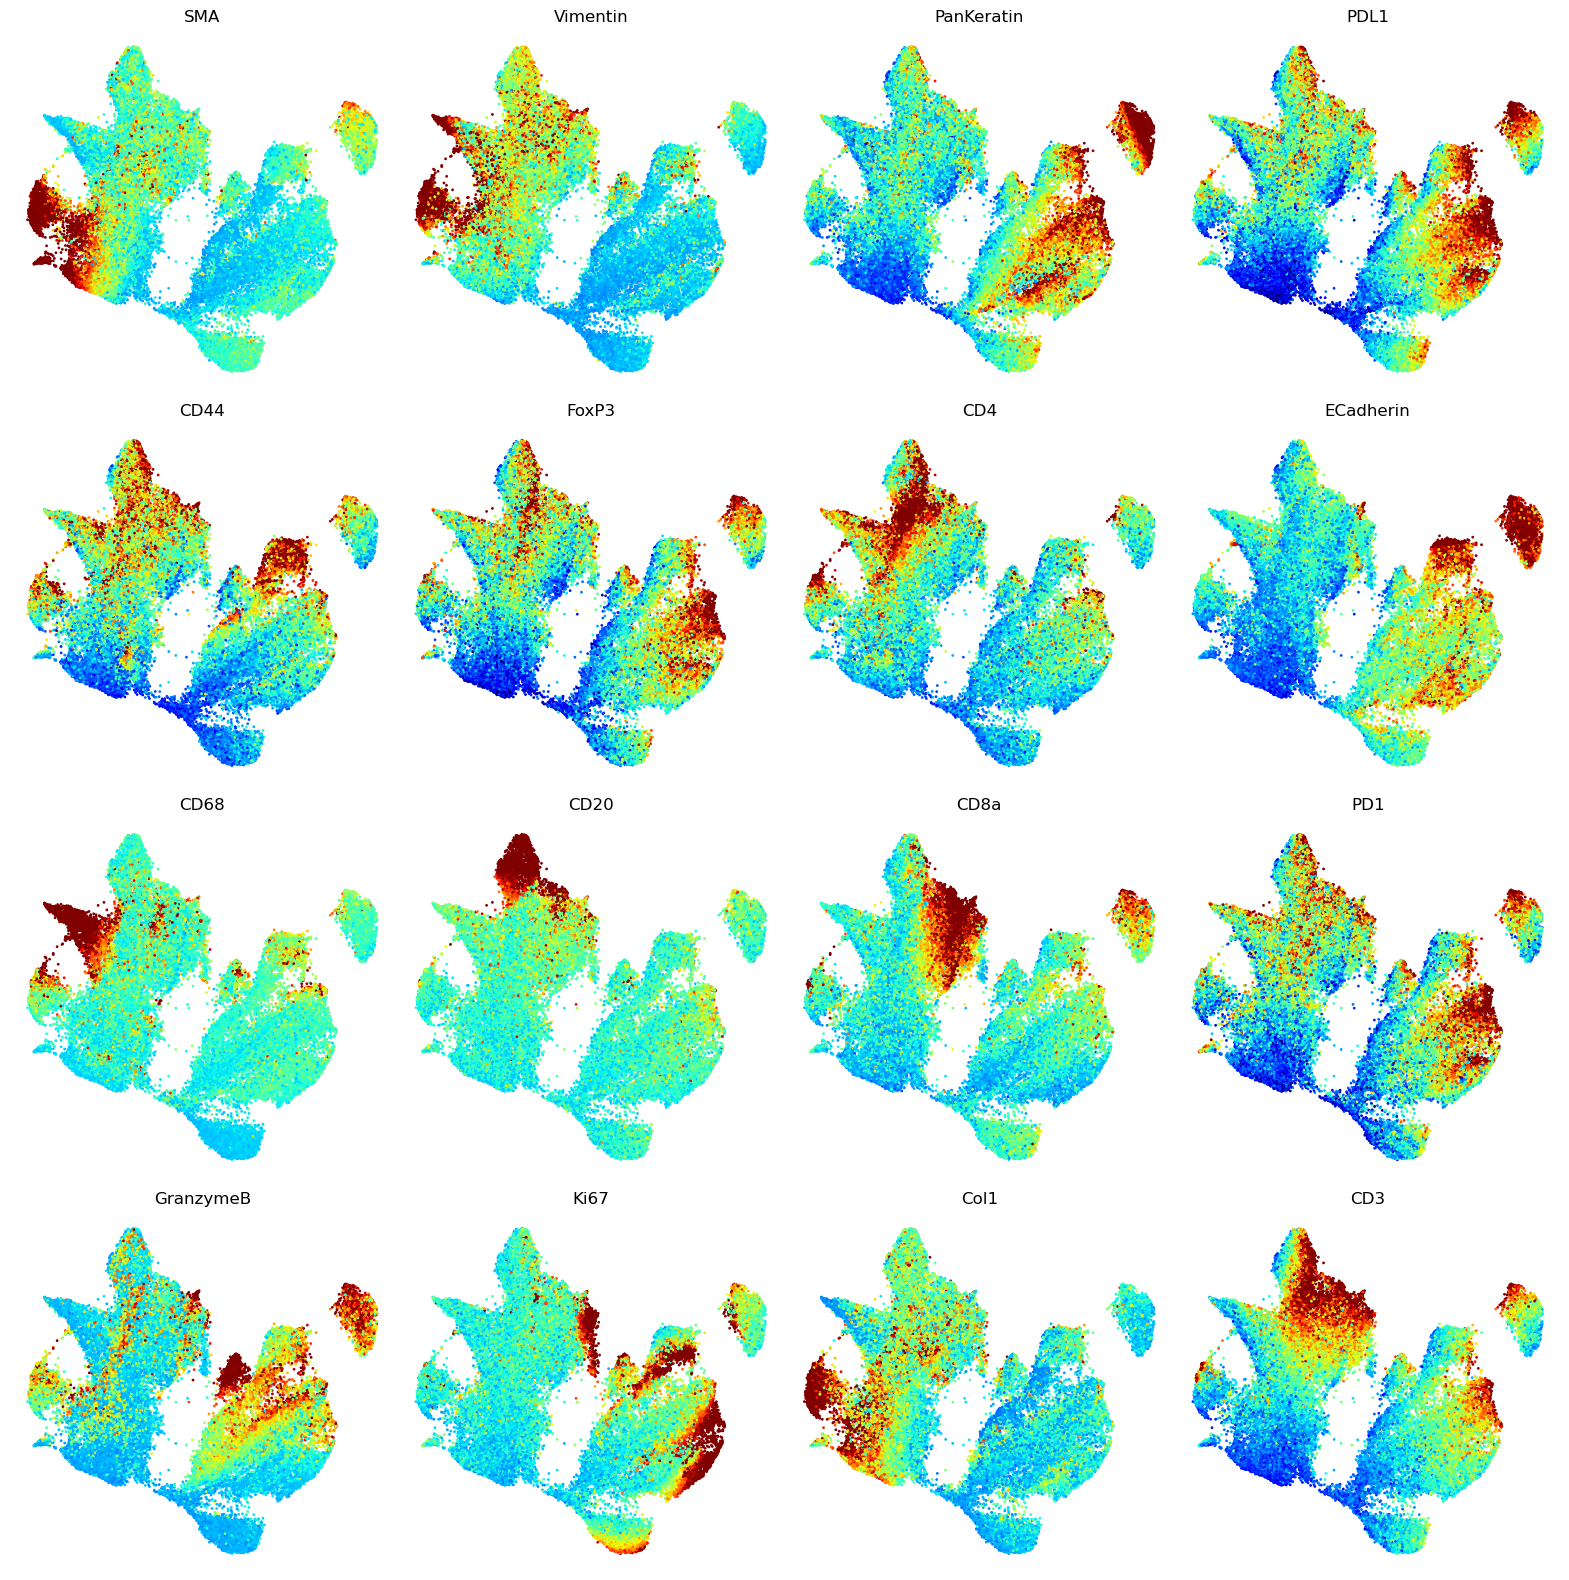

In [32]:
X, Y = embeddings[:, 0], embeddings[:, 1]
fig, axs = plt.subplots(4,4,figsize=(20, 20))
axs = axs.flatten()
for i, ax in enumerate(axs):
    
    try:
            scatter = ax.scatter(X, Y, c=df_subset.iloc[:,i], s=1, cmap='jet', vmin=-2, vmax=2)
            ax.set_title(markers[i])
    except:
        pass
    ax.axis('off')
fig.subplots_adjust(wspace=0.01, hspace=0.1)
plt.show()

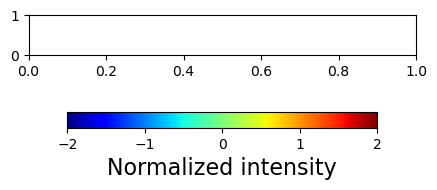

In [39]:
fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.5)
cbar = fig.colorbar(scatter, ax=ax, orientation='horizontal', shrink=0.8, pad=0.5)
cbar.set_label('Normalized intensity', size=16)
plt.show()